# Molecular Modelling Exercises

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

---

# Getting started with the RDKit

## Calculate Descriptors

RDKit contains a 'List of Available Descriptors' (https://www.rdkit.org/docs/GettingStartedInPython.html). To be able to use them we have to import the submodule into our notebook.

In [22]:
import math

from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Descriptors3D
from rdkit.Chem import Lipinski
from rdkit.Chem import AllChem
from rdkit.Chem import rdchem
import pandas as pd
from scipy import stats

First let's load the database using pandas which we will use for the next few exercises.
<details>
<summary>Click for a tip</summary>
Either use pandas directly or check out RDKits PandasTools:
    <a> https://rdkit.org/docs/source/rdkit.Chem.PandasTools.html </a>
</details>


In [23]:
from rdkit.Chem import PandasTools

In [24]:
molecules = pd.read_csv("drugs.smi",sep=",")

PandasTools.AddMoleculeColumnToFrame(molecules,'smiles','Molecule',includeFingerprints=True)

#molecules

[16:40:47] Unusual charge on atom 0 number of radical electrons set to zero


# Exercise 1: Linear Regression

1) Calculate the descriptors for the exact molecular weight and the heavy atom molecular weight.
<details>
<summary>Click for a tip</summary>
You need to draw the molecules to be able to calculate the descriptors.
</details>
<details>
<summary>Click for a tip</summary>
The commands you are looking for are 'Descriptors.ExactMolWt' and 'Descriptors.HeavyAtomMolWt'.
</details>

In [27]:
molecules['ExactMolWt'] = molecules['Molecule'].apply(Descriptors.ExactMolWt)
molecules['HeavyAtomMolWt'] = molecules['Molecule'].apply(Descriptors.HeavyAtomMolWt)


molecules[['name', 'ExactMolWt', 'HeavyAtomMolWt']]

,name,ExactMolWt,HeavyAtomMolWt
0,Bivalirudin,2178.985813,2041.213
1,Goserelin,1268.641439,1184.761
2,Gramicidin D,1810.033419,1675.173
3,Desmopressin,1068.426955,1004.726
4,Cetrorelix,1429.669818,1338.328
...,...,...,...
9072,Magnesium acetate,142.011650,136.345
9073,Baloxavir marboxil,571.122478,548.374
9074,Tetraglyme,222.146724,200.105
9075,alpha-Tocopherol succinate,530.397125,476.358


2) Investigate the correlation between the two descriptors
<details>
<summary>Click for a tip</summary>
You have already learnt how to plot things, don't forget to label the axis! Linear regression is part of `scipy.stats`, so you have to load 'from scipy.stats import linregress'.
</details>

In [ ]:
import matplotlib.pyplot as plt

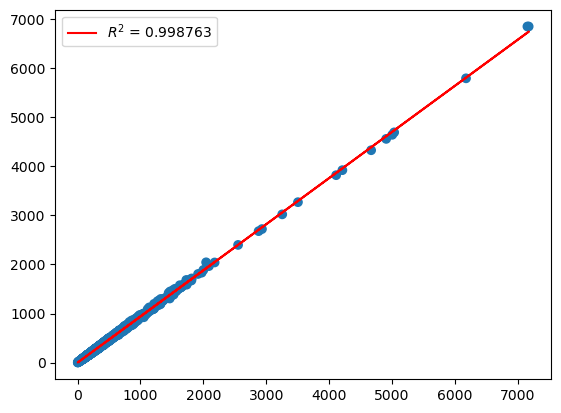

In [ ]:
res_regress = stats.linregress(molecules["ExactMolWt"], molecules["HeavyAtomMolWt"])


plt.scatter(molecules["ExactMolWt"],molecules["HeavyAtomMolWt"],linestyle ="")
plt.plot(molecules["ExactMolWt"], res_regress.intercept +  res_regress.slope*molecules["ExactMolWt"], label=f"$R^2$ = {res_regress.rvalue**2:.6f}",color="red")
plt.legend()
plt.xlabel("Exac")
plt.show()

# Exercise 2: Lipinski Rule of 5

- Determine the percentage of drugs which fulfill the Lipinski rule. (you may need to import another submodule named [`Lipinski`](https://www.rdkit.org/docs/source/rdkit.Chem.Lipinski.html).)
<details>
<summary>Click for a tip</summary>
Remember the rule of Lipinski, what does it say and what do you need to evaluate it?
</details>
<details>
<summary>Click for a tip</summary>
Let the entries be boolean (`True` or `False`) if the defined part applies or not. A summation (`True` = 1 and `False` = 0) let you determine the maintainance of the Lipinksi rule.
</details>
<details>
<summary>Click for a tip</summary>
With `value_counts` you can determine the fraction/percentage.
</details>


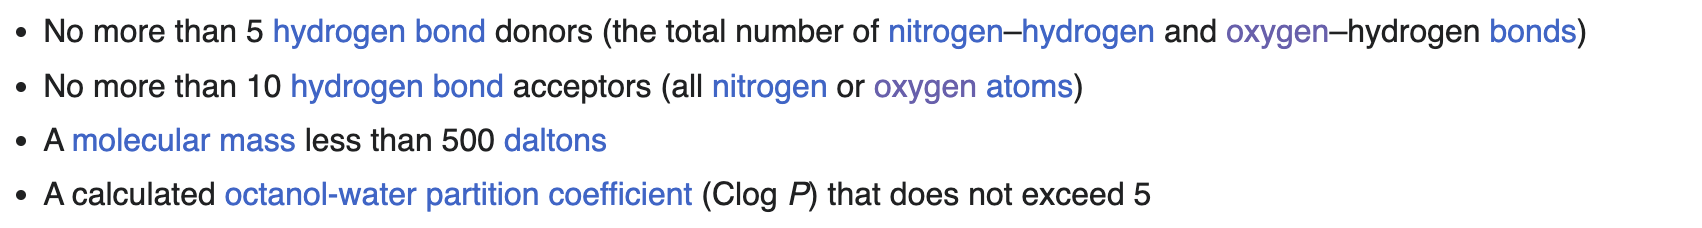

In [58]:
def check_lipinski(molecule):
    """
    Check if a molecule satisfies the Lipinski rule of five.
    
    i.e

    + No more than 5 hydrogen bond donors
    + No more than 10 hydrogen bond acceptors
    + Molecular mass less than 500daltons
    + LCOP 5 does not exceed 5


    Parameters:
    molecule (rdkit.Chem.rdchem.Mol): The molecule to check.
    
    Returns:
    bool: True if the molecule satisfies the Lipinski rule of five, False otherwise.
    """
    h_donors = Lipinski.NumHDonors(molecule)
    h_acceptors = Lipinski.NumHAcceptors(molecule)
    mol_weight = Descriptors.MolWt(molecule)
    log_p = Descriptors.MolLogP(molecule)
    
    # Check the Lipinski rule of five
    if h_donors <= 5 and h_acceptors <= 10 and mol_weight < 500 and log_p <= 5:
        return True
    else:
        return False


In [ ]:
# apply this shit to our molecule

molecules["Lipinski_nice"] = molecules["Molecule"].apply(check_lipinski)

,Unnamed: 0,name,smiles,Molecule,ExactMolWt,HeavyAtomMolWt,dlll,Lipinski_nice
0,0,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,<rdkit.Chem.rdchem.Mol object at 0x17a8e0a50>,2178.985813,2041.213,21789.858129,False
1,1,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x17a8e0ac0>,1268.641439,1184.761,12686.414394,False
2,2,Gramicidin D,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,<rdkit.Chem.rdchem.Mol object at 0x17a8e0ba0>,1810.033419,1675.173,18100.334192,False
3,3,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,<rdkit.Chem.rdchem.Mol object at 0x17a8e0c80>,1068.426955,1004.726,10684.269555,False
4,4,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,<rdkit.Chem.rdchem.Mol object at 0x17a8e0d60>,1429.669818,1338.328,14296.698183,False


In [66]:
# now calculate the percentage that obey the lipinsky 5

percentage = len(molecules[molecules["Lipinski_nice"] == False]) / len(molecules[molecules["Lipinski_nice"] == True])
print(percentage)


0.32221412964311724


In [67]:
assert percentage > 0 and percentage < 1, "The percentage should be inbetween 0 and 1."

# Exercise 3: Radius of Gyration

- Take 100 random molecules from the data base and continue with this selection
- Investigate the correlation between the molecular weight and the radius of gyration. 

To calculate the radius of gyration, you will need to generate 3D conformations, for example with `EmbedMolecule`. 

Q: This may result in an error for some molecules, why and how can you resolve this issue?

YOUR ANSWER HERE

1) Take 100 random molecules from the data base and continue with this selection.
<details>
<summary>Click for a tip</summary>
Take 100 random molecules with the `sample` command from `pandas`.
</details>

In [94]:
random_sample = molecules.sample(n=100)

In [95]:
# Add explicit hydrogens to the molecules
random_sample['Molecule_with_H'] = random_sample['Molecule'].apply(Chem.AddHs)

# Embed the molecules
embeded_randoms_with_H = [AllChem.EmbedMolecule(mol, useRandomCoords=True) for mol in random_sample['Molecule_with_H']]

[17:13:24] UFFTYPER: Unrecognized charge state for atom: 0
[17:13:24] UFFTYPER: Unrecognized charge state for atom: 0
[17:13:24] UFFTYPER: Unrecognized atom type: Mo2+6 (1)
[17:13:26] UFFTYPER: Unrecognized atom type: Tc1+5 (0)
[17:13:27] UFFTYPER: Unrecognized atom type: V_2+5 (0)
[17:14:56] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[17:14:56] UFFTYPER: Unrecognized charge state for atom: 0
[17:14:56] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[17:14:56] UFFTYPER: Unrecognized charge state for atom: 0


2) Calculate the Radius of Gyration and Molecular Weight for the selection.
<details>
<summary>Click for a tip</summary>
Before making 3D structures don't forget to add hydrogens. You can verify the process by visualizing one of your random drugs before and after the adding (.values[0] for the first molecule).
</details>
<details>
<summary>Click for a tip</summary>
Be aware of undefined ROGs. Drop them if necessary. You can use 'pd.concat().drop_duplicates(keep=False)' for that.
</details>

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [99]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

3) Investigate and visualize the correlation between the two Descriptors.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()